# Floresta de Caminhos Ótimos (Optimum-Path Forest)

O OPF é um *framework* para o desenvolvimento de classificadores *supervisionados* e *não-supervisionados* (a versão supervisionada foi criada pelo professor *João Paulo Papa*). A base destes métodos é a representação dos conjuntos de amostras como grafos.

## OPF Supervisionado

O OPF supervisionado é utilizado para tarefas de classificação, como já estamos acostumados a fazer. Basicamente, o treinamento desse modelo se divide nas seguintes etapas:

### 1 - Representação dos dados

O conjunto de dados é representado por um grafo, onde cada vértice (ou nó) representa uma amostra e sua posição no grafo é representado pelo valor de cada uma de suas características. Esses vértices são conectados por arestas, cujos pesos são representados pela distância entre o par de vértices. 


<img src='assets/graphOPF.jpeg' width=400px>

Note que este grafo pode ser completo, i.e., todos os vértices são conectados a todos os outros vértices, ou $k$-nn, ou seja, cada vértice está conectado aos $k$ vizinhos mais próximos.

- Grafo Completo
<img src='assets/grafoCompleto.jpeg' width=400px>

- Grafo $k$-nn
<img src='assets/grafoknn.jpeg' width=400px>

### 2 - Obtenção dos protótipos

Os protótipos são as amostras mais representativas de cada classe, e iniciam o processo de conquista das demais amostras. Esses protótipos podem ser encontrados em um processo de 2 etapas:

1. Computar a árvore geradora mínima ( _Minimum spanning tree (MST)_ ). Essa árvore pode ser computada utilizando diversos algoritmos, como por exemplo Dijkstra, Prim ou Kruskal. Geralmente Prim ou Kruskal é o utilizado. 

<img src='assets/Dijkstra_Animation.gif' width=400px>

2. Seleciona os vértices na região de fronteira entre as classes como protótipos:

<img src='assets/prototipos.png' width=400px>


### 3 - Conquista e classificação

Após a definição dos protótipos, cada amostra recebe um custo associado, definido da seguinte maneira:

\begin{eqnarray}
 \label{e.fmax}
f_{max}(\langle
q\rangle) & = & \left\{ \begin{array}{ll}
  0 & \mbox{if q $\in {\cal P}$,} \\
  +\infty & \mbox{otherwise}
  \end{array}\right. \nonumber \\
  f_{max}(\phi_{q} \cdot \langle q,u \rangle) & = & \max\{f_{max}(\phi_{q}),d(q,u)\}, 
\end{eqnarray}


onde ${\cal P}$ é o conjunto de protótipos, $\phi_{q}$ é um caminho, i.e., uma sequência de nós adjacentes iniciado em ${\cal P}$ e terminando em ${q}$, e $d(q,u)$ entre os nós $q$ e $u$. Além disso, $\phi_{q} \cdot \langle q,u \rangle$ é a concatenação entre o caminho $\phi_{q}$ e a aresta $\langle q,u \rangle$. Resumindo, $f_{max}(\phi_{q})$ é a distância máxima de todas as amostras no caminho $\phi_{q}$.

Na sequência, é estabelecida uma competição entre os protótipos para definir a conquista das damais amostras. O processo é executado de forma a minimizar o custo associado a cada amostra, da seguinte maneira:

\begin{equation}
\label{e.conquering_function}
	C(u)  =  \min_{\forall q \in {\cal V}}\{\max\{C(q),d(q,u)\}\}, 
\end{equation}
onde ${\cal V}$ é o conjunto de vizinhos de $u$.

## Classificação com OPF utilizando OPFython

O código para executar o OPF está disponível em Python atravéz do pacote [OPFython](https://arxiv.org/abs/2001.10420), que pode ser clonado do repositório [Github](https://github.com/gugarosa/opfython) ou instalado via pip com o comando `pip install opfython`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# importando função para dividir o conjunto em treinamento e teste, assim como 
#   fazemos com a função train_test_split do scikit-learn
import opfython.stream.splitter as s

# Importando o OPF supervisionado para classificação
from opfython.models.supervised import SupervisedOPF


# usando as configurações padrões do seaborn para plotagem
import seaborn as sns; sns.set()

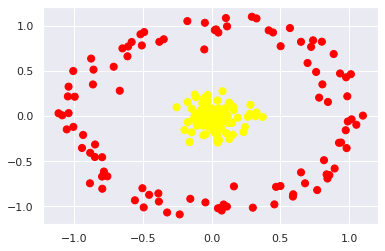

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(200, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [3]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = s.split(
    X, y, percentage=0.8, random_state=1)

# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

2022-02-08 13:21:42,997 - opfython.stream.splitter — INFO — Splitting data ...
2022-02-08 13:21:43,010 - opfython.stream.splitter — DEBUG — X_1: (160, 2) | X_2: (40, 2) | Y_1: (160,) | Y_2: (40,).
2022-02-08 13:21:43,010 - opfython.stream.splitter — INFO — Data splitted.
2022-02-08 13:21:43,011 - opfython.models.supervised — INFO — Overriding class: OPF -> SupervisedOPF.
2022-02-08 13:21:43,012 - opfython.core.opf — INFO — Creating class: OPF.
2022-02-08 13:21:43,012 - opfython.core.opf — DEBUG — Distance: log_squared_euclidean | Pre-computed distance: False.
2022-02-08 13:21:43,013 - opfython.core.opf — INFO — Class created.
2022-02-08 13:21:43,013 - opfython.models.supervised — INFO — Class overrided.
2022-02-08 13:21:43,014 - opfython.models.supervised — INFO — Fitting classifier ...
2022-02-08 13:21:43,015 - opfython.models.supervised — DEBUG — Finding prototypes ...
2022-02-08 13:21:44,033 - opfython.models.supervised — DEBUG — Prototypes: [53, 81].
2022-02-08 13:21:44,086 - opfyt

In [4]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Utilizando outros conjuntos de dados

In [5]:
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
#X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False) # 28x28
X, y = load_digits(return_X_y=True) # 8x8 -> 10 classes (0,...,9)

In [6]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.30)

# ou 

#X_train, X_test, Y_train, Y_test = s.split(
#    X, y, percentage=0.8, random_state=1)

In [7]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# manhattan_distance
# jaccard
# squared_euclidean

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

2022-02-08 13:21:44,974 - opfython.models.supervised — INFO — Overriding class: OPF -> SupervisedOPF.
2022-02-08 13:21:44,978 - opfython.core.opf — INFO — Creating class: OPF.
2022-02-08 13:21:44,980 - opfython.core.opf — DEBUG — Distance: log_squared_euclidean | Pre-computed distance: False.
2022-02-08 13:21:44,982 - opfython.core.opf — INFO — Class created.
2022-02-08 13:21:44,985 - opfython.models.supervised — INFO — Class overrided.
2022-02-08 13:21:44,988 - opfython.models.supervised — INFO — Fitting classifier ...
2022-02-08 13:21:45,026 - opfython.models.supervised — DEBUG — Finding prototypes ...
2022-02-08 13:21:46,700 - opfython.models.supervised — DEBUG — Prototypes: [474, 1040, 438, 788, 871, 963, 387, 887, 418, 591, 480, 1154, 108, 540, 718, 650, 858, 616, 993, 997, 271, 1030, 552, 351, 1003, 19, 1033, 1103, 350, 970, 828, 191, 952, 274, 341, 1060, 524, 501, 707, 119, 103, 520, 1061, 1241, 833, 88, 112].
2022-02-08 13:21:49,953 - opfython.models.supervised — INFO — Classif

In [8]:
#from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        49
           3       0.95      0.93      0.94        56
           4       1.00      1.00      1.00        45
           5       1.00      0.98      0.99        50
           6       1.00      1.00      1.00        60
           7       0.93      0.97      0.95        40
           8       0.92      0.95      0.93        59
           9       0.96      0.91      0.94        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [9]:
import logging
logging.disable()

In [10]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF("manhattan")
# jaccard
# squared_euclidean
# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.95      1.00      0.98        62
           2       1.00      0.98      0.99        49
           3       0.91      0.93      0.92        56
           4       1.00      1.00      1.00        45
           5       1.00      0.96      0.98        50
           6       1.00      1.00      1.00        60
           7       0.95      0.97      0.96        40
           8       0.92      0.92      0.92        59
           9       0.94      0.91      0.93        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [11]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF("jaccard")
# squared_euclidean

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.95      1.00      0.98        62
           2       0.98      1.00      0.99        49
           3       0.96      0.95      0.95        56
           4       1.00      1.00      1.00        45
           5       1.00      0.96      0.98        50
           6       1.00      1.00      1.00        60
           7       0.97      0.97      0.97        40
           8       0.93      0.95      0.94        59
           9       0.94      0.91      0.93        56

    accuracy                           0.97       540
   macro avg       0.98      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [12]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF("squared_euclidean")
# kullback_leibler
# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        49
           3       0.95      0.93      0.94        56
           4       1.00      1.00      1.00        45
           5       1.00      0.98      0.99        50
           6       1.00      1.00      1.00        60
           7       0.93      0.97      0.95        40
           8       0.92      0.95      0.93        59
           9       0.96      0.91      0.94        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [13]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF("kullback_leibler")
# 
# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.42      0.92      0.58        62
           2       0.82      0.57      0.67        49
           3       0.69      0.79      0.73        56
           4       0.90      0.58      0.70        45
           5       0.78      0.86      0.82        50
           6       0.95      0.87      0.90        60
           7       0.84      0.95      0.89        40
           8       1.00      0.25      0.41        59
           9       0.78      0.64      0.71        56

    accuracy                           0.74       540
   macro avg       0.82      0.74      0.74       540
weighted avg       0.82      0.74      0.74       540



## Aprendizado não supervisionado

Em problemas de aprendizado não-supervisionado, temos apenas os dados de entrada ($X$) sem rótulos, e gostariamos que o algoritmo seja capaz de encontras alguma estrutura que represente os dados. Um algoritmo de agrupamento, como o OPF não-supervisionado, por exemplo, tenta juntar amostras em **agrupamentos** ( _clusters_ ) de acordo com alguma similaridade.


Exemplos: Análise de redes sociais, organização de _clusters_ de computadores, análise de dados astronômicos.





### Clustering (agrupamento)

Dado um conjunto de pontos, a ideia é agrupá-los de modo que:

- amostras dentro de cada agrupamento são similares entre si;
- amostras de agrupamentos diferentes são dissimilares;

Similaridade é definida usando alguma métrica de distância:

- euclidiana;
- cossenos;
- mahalanobis ...


<img src='assets/clustering1.jpg' width=900px>


## OPF Não-supervisionado

De forma similar a versão supervisionada, na versão não-supervisionada as amostras também são representadas como nós em um grafo, são escolhidos os protótipos, seguido pela etapa de conquista. No entanto, existem algumas diferenças:

### Obtenção dos protótipos

Na versão não-supervisionada, o peso inicial de cada amostra é dado pelo valor de sua densidade, a qual é computada usando a seguinte função de distribuição de probabilidade:

\begin{eqnarray}
  \rho(q) & = & \frac{1}{\sqrt{2\pi\psi^2}k} \sum_{\forall u\in {\cal A}_k(q)} \exp\left(\frac{-d^2(q,u)}{2\psi^2}\right), \label{e.density}
\end{eqnarray}

onde ${\cal A}_k(q)$ representa os $k$ vizinhos mais próximos da amostra $q$, $\psi = \frac{d_f}{3}$, e $d_f$ é o peso máximo entre as arestas no grafo. Note que o número de vizinhos ideal $k^*$ é escolhido de acordo com uma métrica de corte no grafo, onde todos os valores de $k$ no intervalo [$k_{min}$,$k_{max}$] ($k_{min}$ e $k_{max}$ são hiperparâmetros) são testados em uma busca exaustiva.

Todas as amostras são adicionadas em uma lista ordenada pelo valor de suas respectivas densidades de forma decrescente. A primeira amostra (com maior densidade) é removida dessa lista e automáticamente se transforma em um protótipo e tenta conquistar as amostras vizinhas. As proximas amostras são removidas consecutivamente da lista e é verificado se essa amostra já foi conquistada. Caso não tenha sido conquistada, ela também se transforma em um protótipo.

## Conquista

Para conquistar uma amostra durante o treinamento, um protótipo ou uma amostra conquistada deve oferecer um custo melhor ao que essa amostra já possui. Esse custo é computado da seguinte forma:


\begin{eqnarray}
\label{e.pf2}
f_{min}(\langle u \rangle) & = & \left\{ \begin{array}{ll} 
    \rho(u)           & \mbox{if $u \in {\cal P}$} \\
    \rho(u) - \delta  & \mbox{otherwise,}
 \end{array}\right. \nonumber \\
f_{min}(\langle \phi_q\cdot \langle q,u\rangle\rangle)&=& \min \{f_{min}(\phi_{q}), \rho(u)\},
\end{eqnarray}
onde $\delta$ é uma constante pequena. A Figura abaixo ilusta o procedimento:

<img src='assets/naoSup.jpeg' width=600px>

- (a) densidades
- (b) removeu 1° amostra, que se tornou protótipo
- (c) após processo de conquista

## Clustering com OPF utilizando OPFython

In [14]:
import opfython.math.general as g
import opfython.stream.parser as p
from opfython.models import UnsupervisedOPF

from sklearn.datasets import make_blobs

# Para não ficar mostrando logs
import logging
logging.disable()

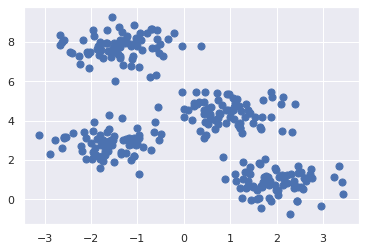

In [15]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [16]:
# Cria uma instância do opf não supervisionado
opf = UnsupervisedOPF(min_k=1, max_k=20)

In [17]:
# Ajusta o modelo aos dados
opf.fit(X, y_true)

In [18]:
# Se os dados estiverem rotulados, propaga o rótulo real de cada protótipo para todas as amostras por ele
#   conquistadas
opf.propagate_labels()

Número de agrupamentos =  4


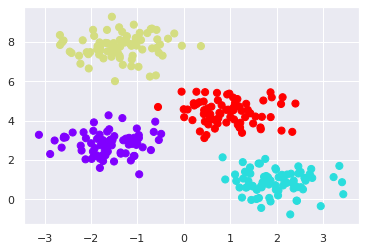

In [19]:
# faz a estimativa dos rótulos baseado no agrupamento
preds, clusters = opf.predict(X)


print('Número de agrupamentos = ',len(np.unique(clusters)))

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='rainbow')


## Classificando com os rótulos propagados

Caso tenha propagado os rótulos, é possível utilizar essa abordagem para executar tarefas de classificação:

In [20]:
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Sem os rótulos no treinamento:

In [21]:
# Cria uma instância do opf não supervisionado
opf = UnsupervisedOPF(min_k=1, max_k=20)

# Ajusta o modelo aos dados
opf.fit(X)

# Se os dados estiverem rotulados, propaga o rótulo real de cada protótipo para todas as amostras por ele conquistadas
opf.propagate_labels()

Número de agrupamentos =  4


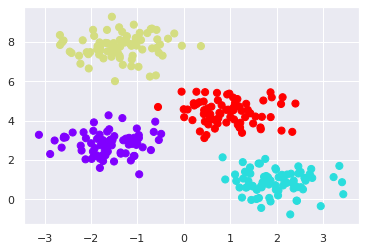

In [22]:
# faz a estimativa dos rótulos baseado no agrupamento
preds, clusters = opf.predict(X)


print('Número de agrupamentos = ',len(np.unique(clusters)))

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='rainbow')


In [23]:
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.25      1.00      0.40        75
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        75

    accuracy                           0.25       300
   macro avg       0.06      0.25      0.10       300
weighted avg       0.06      0.25      0.10       300



/home/roder/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roder/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roder/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exercícios:

Baixe os datasets Breast Tissue e Landsat Satellite do repositório UCI.

1. Separar em treinamento e teste e classificar as amostras de teste utilizando o OPF supervisionado. 

2. Agrupar os dados utilizando o OPF-não supervisionado e propagar o rótulo considerando um conjunto de treinamento. Classificar as amostras de teste considerando os rótulos propagados.